In [1]:
import json
import pandas as pd
import numpy as np

## 1. From json to pandas

In [2]:
business_list = []
with open('business.json', 'r') as f:
    for cnt, line in enumerate(f):
        try:
            line = line.strip('\n').strip(',')
#            json_obj = json.loads(line)
            business_list.append(json.loads(line))
        except Exception as e:
            print(e)
            continue
business = pd.DataFrame(business_list)

In [28]:
tip_list = []
with open('tip.json', 'r') as f:
    for cnt, line in enumerate(f):
        try:
            line = line.strip('\n').strip(',')
            tip_list.append(json.loads(line))
        except Exception as e:
            print(e)
            continue
tip = pd.DataFrame(tip_list)

In [4]:
user_list = []
with open('user.json', 'r') as f:
    for cnt, line in enumerate(f):
        try:
            line = line.strip('\n').strip(',')
            user_list.append(json.loads(line))
        except Exception as e:
            print(e)
            continue
user = pd.DataFrame(user_list)

In [5]:
review_list = []
with open('review.json', 'r') as f:
    for cnt, line in enumerate(f):
        try:
            line = line.strip('\n').strip(',')
            review_list.append(json.loads(line))
        except Exception as e:
            print(e)
            continue
review = pd.DataFrame(review_list)

In [6]:
# extract year
review['date'] = review['date'].str[:4]

In [7]:
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013,1,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016,0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018,0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018,0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


## 2. Word Cloud

In [9]:
# drop NA (records without categories)
business = business[business['categories'].isnull() ==False]
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [13]:
from os import path 
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt


text = ' '.join(business['categories']) 

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 640x480 with 1 Axes>

## 3. Choose subsample
(1) Select restaurant business

(2) Select "Ice Cream" subsample

(3) Restaurants in the US

(4) Restaurants is open and with more than 10 reviews

In [16]:
# Restaurant Subsample
business_index = business[business['categories'].str.contains('Ice Cream')]

In [17]:
len(business_index)

2764

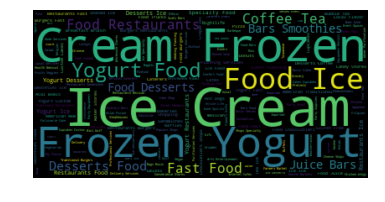

In [18]:
text = ' '.join(business_index['categories']) 

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
ice = business[(business['categories'].str.contains('Ice'))&(business['is_open']==1)&(business['review_count']>10)]
ice = ice.loc[(ice['city']=='Pittsburgh')|(ice['city']=='Charlotte')|
                    (ice['city']=='Urbana')|(ice['city']=='Phoenix')|(ice['city']=='Las Vegas')|
                    (ice['city']=='Madison')|(ice['city']=='Cleveland')]
ice_id = ice['business_id']

review_index = review[review['business_id'].isin(ice_id)]
len(review_index)

45893

## 4. Export csv

In [20]:
ice.to_csv('ice.csv',index=False) # business

In [21]:
review_index['date'] = review_index['date'].astype('int')
review_01 = review_index[review_index['date']>2009]
len(review_01)

/Users/kechen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


44882

In [22]:
review_01.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
201,O-fYUqXjkwNvRfFnlUH6Iw,0,2018,0,RThSyUZ1myb0-Nmjr8BFIw,2.0,"Wonderful cookies, but don't order delivery. T...",0,RnkKHzIl3LVee_Q6zooQMQ
362,TBnB4iIU0pVKkAzN4T8xNg,0,2016,0,Xaa4EpeOb8_U-DxaFVnSnQ,5.0,"Wow! So fresh, ripe, and sweet! And right in m...",0,0EVRg-vTwGwIsXNzZ_CORQ
477,_lpqjZAseSvoDxPN-_JnzQ,0,2017,0,-bmjCY2ItbLszta-4otAoA,5.0,Great location; convenient to the light rail a...,0,dLYgi5MavKXhE62Sshd5Zg
543,8REOSFVMO-E1VrmLvY49Tg,0,2018,0,M2hQtEA6us3euOudiWdOSQ,3.0,Ice cream is ok. To Pricey. Bought two cone...,0,zGHuQJjzDOy2iz5ZJwWfCg
1102,GhOWffUr9yDBxB5Ceqzc_Q,2,2011,2,tTE48wqGP0LyEsnwCdiJWw,2.0,the ice cream is great but the owner is very r...,2,ji76ZP3X7OIQlx2MvN1tWg


In [23]:
review_01['coolfun'] = review_01['cool']+review_01['funny']
review_02 = review_01.drop(['cool','funny'],axis=1)
review_02.to_csv('review.csv',index=False)

/Users/kechen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
tip['date'] = tip['date'].str[:4]
tip['date'] = tip['date'].astype('int')
tip = tip[tip['date']>2009]
tip = tip[tip['business_id'].isin(ice_id)]

In [30]:
tip.head()

,business_id,compliment_count,date,text,user_id
1,OPiPeoJiv92rENwbq76orA,0,2013,Happy Hour 2-4 daily with 1/2 price drinks and...,Ocha4kZBHb4JK0lOWvE0sg
111,WHdmQ-zPYYTJUqaUOfNpkQ,0,2012,Very good very different!,6ZC-0LfOAGwaFc5XPke74w
159,VHZPbCbIPHEkKOotdCTiow,0,2014,Better than kuma. X10,QDvX9KJ53kt3O7M3k43Iew
185,kwMJ4KfhEcrk9jiMe-S6wQ,0,2012,Terrific little restaurant with wood fired piz...,QQtoHnP0cP7nzNnUob_1CQ
551,PJxqFL-xUmUaCe2STc5VRA,0,2012,Stale ice cream !!! Blah,waDvmAl78R3Ke5Ube5cXkw


In [32]:
tip.to_csv('tip.csv',index=False)

In [33]:
user.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,...,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,...,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,...,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
3,4.85,0,0,0,1,0,0,0,0,2,...,14,,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
4,4.08,80,0,80,28,1,1,16,5,57,...,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50


In [34]:
user['yelping_since'] = user['yelping_since'].str[:4]

In [136]:
min(user['compliment_cool']==user['compliment_funny'])

True

In [146]:
user.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')

In [35]:
user_id_list = review_02['user_id']
user_1 = user[user['user_id'].isin(user_id_list)]

In [36]:
len(user_1)

33564

In [37]:
user_1 = user_1.drop(['compliment_funny'],axis=1)

In [38]:
user_1.to_csv('user.csv',index=False)